### Imports

In [1]:
%cd ..

/Users/jamahusseinmohamud/Desktop/research/DM research/large_scale_correlations/large_scale_task_correlation


In [2]:
!ls

README.md        graph.graphml    notebooks        src
data             graph.png        requirements.txt


In [5]:
import torch
import math
import torchvision
from torchvision import transforms
import json
import os
import numpy as np
from PIL import Image
import seaborn as sns
import pandas as pd
import multiprocessing
import matplotlib.pyplot as plt
from src.cocoapi.PythonAPI.pycocotools.coco import COCO

### Label correlation Matrix

In [7]:
ann_file = "./data/coco_datasets/annotations/instances_train2017.json"
coco = COCO(ann_file)

# Get list of category_ids, here [2] for bicycle
category_ids = coco.getCatIds(["bicycle"])

# Get list of image_ids which contain bicycles
image_ids = coco.getImgIds(catIds=[category_ids[0]])
print("category_ids: ", category_ids)
print("image_ids: ", image_ids[0:5])


loading annotations into memory...
Done (t=9.53s)
creating index...
index created!
category_ids:  [2]
image_ids:  [196610, 344067, 155652, 417797, 294918]


In [3]:
annotation_ids = coco.getAnnIds(imgIds=87038, catIds=[])
print(len(annotation_ids))

0


In [6]:
image_ids = np.array(coco.getImgIds())
print(len(image_ids))
image_ids

118287


array([391895, 522418, 184613, ..., 516168, 547503, 475546])

In [7]:
image_name = coco.loadImgs(ids=[184613])[0]['file_name']
image_path = f'./coco/images/train2017/{image_name}'
print(f"image_path: {image_path}")

'./coco/images/train2017/000000184613.jpg'

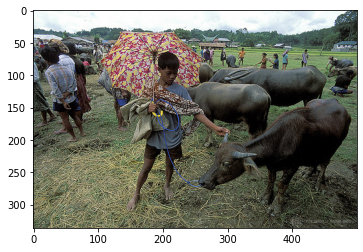

In [8]:
image = Image.open(image_path)
plt.imshow(image)
plt.show()

'JPEG'

In [9]:
cat_ids = coco.getCatIds()
print('number_classes: ', len(cat_ids), 'first category id: ', cat_ids[0])

number_classes:  80 first category id:  1


In [11]:
coco.loadCats(ids=[cat_ids[0]])[0]['name']

'person'

In [15]:
coco.getAnnIds(imgIds=184613, catIds=[1])

[1202318,
 1236161,
 1250302,
 1275450,
 1280839,
 1281132,
 1288242,
 1289336,
 1304428,
 1309365,
 1676698,
 1686503,
 2022171,
 900100184613]

In [16]:
labels_ = []
for j, catId in enumerate(cat_ids):
    annotation_ids = coco.getAnnIds(imgIds=184613, catIds=[catId])
    print(
        "catId: ",
        catId,
        "| label: ",
        coco.loadCats(ids=[catId])[0]["name"],
        "| total: ",
        len(annotation_ids),
    )
    if len(annotation_ids) > 0:
        labels_.append(1)
    else:
        labels_.append(0)


catId:  1 | label:  person | total:  14
catId:  2 | label:  bicycle | total:  0
catId:  3 | label:  car | total:  0
catId:  4 | label:  motorcycle | total:  0
catId:  5 | label:  airplane | total:  0
catId:  6 | label:  bus | total:  0
catId:  7 | label:  train | total:  0
catId:  8 | label:  truck | total:  0
catId:  9 | label:  boat | total:  0
catId:  10 | label:  traffic light | total:  0
catId:  11 | label:  fire hydrant | total:  0
catId:  13 | label:  stop sign | total:  0
catId:  14 | label:  parking meter | total:  0
catId:  15 | label:  bench | total:  0
catId:  16 | label:  bird | total:  0
catId:  17 | label:  cat | total:  0
catId:  18 | label:  dog | total:  0
catId:  19 | label:  horse | total:  0
catId:  20 | label:  sheep | total:  0
catId:  21 | label:  cow | total:  9
catId:  22 | label:  elephant | total:  0
catId:  23 | label:  bear | total:  0
catId:  24 | label:  zebra | total:  0
catId:  25 | label:  giraffe | total:  0
catId:  27 | label:  backpack | total:  0


In [30]:
coco.getAnnIds(imgIds=imgIds, catIds=[1]),catId

([439530, 493130, 499271, 509711, 523544, 1720965], 90)

In [34]:
torch.tensor([1 if len(coco.getAnnIds(imgIds=imgIds, catIds=[catId])) > 0 else 0 for catId in cat_ids])

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 0])

In [21]:
multilabel_matrix = np.zeros((len(image_ids), len(cat_ids)))

for i, imgIds in enumerate(image_ids):
    # imgIds = 397133
    for j, catId in enumerate(cat_ids):
        annotation_ids = coco.getAnnIds(imgIds=imgIds, catIds=[catId])
        # print('catId: ', catId, '| label: ', coco.loadCats(ids=[catId])[0]['name'] , '| total: ', len(annotation_ids))
        if len(annotation_ids) > 0:
            multilabel_matrix[i][j] = 1


In [22]:
correlation_matrix = np.corrcoef(multilabel_matrix, rowvar = False)

In [23]:
label_names = []
for catId in cat_ids:
    label_name = coco.loadCats(ids=[catId])[0]['name']
    label_names.append(label_name)

np.array(label_names)

array(['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
       'train', 'truck', 'boat', 'traffic light', 'fire hydrant',
       'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog',
       'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe',
       'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
       'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat',
       'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
       'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
       'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot',
       'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
       'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop',
       'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven',
       'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase',
       'scissors', 'teddy bear', 'hair drier', 'toothbrush'], dtype='<U14')

In [25]:
corr_df = pd.DataFrame(correlation_matrix)
corr_df.columns = label_names
corr_df.set_index(np.array(label_names), inplace=True)

Text(0.5, 1.0, 'Train Multi-label correlation Heatmap')

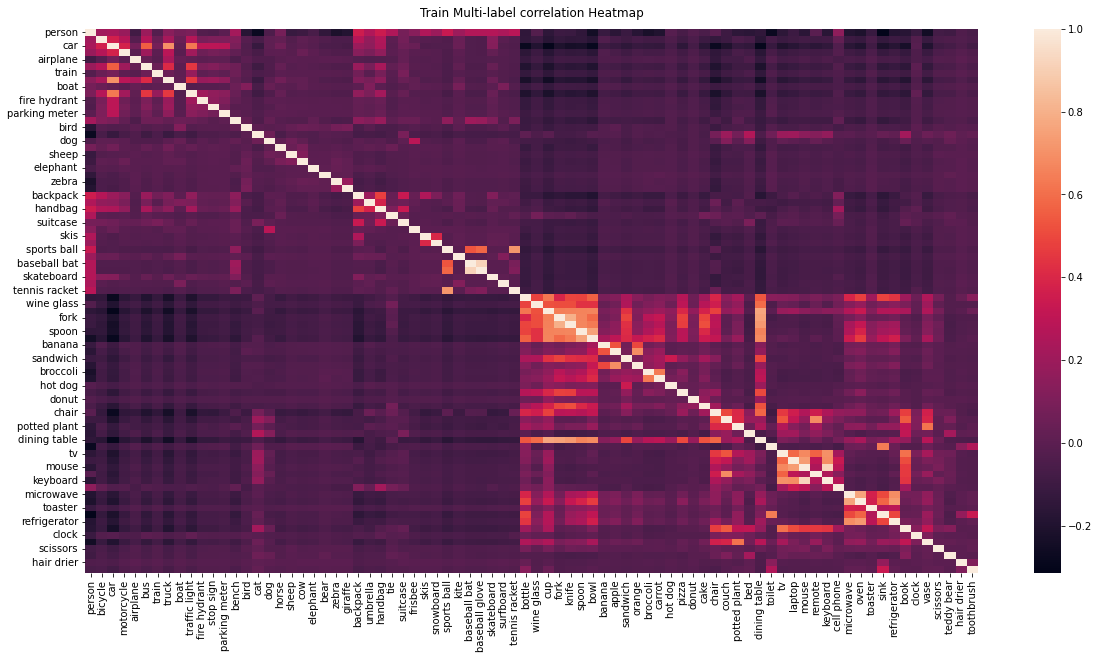

In [26]:
# Increase the size of the heatmap.
plt.figure(figsize=(20, 10))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(corr_df.corr(), annot=False)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title(
    "Train Multi-label correlation Heatmap", fontdict={"fontsize": 12}, pad=12
)


### default dataloader

In [ ]:
seed = 3971
np.random.seed(seed) # Set the random seed of numpy for the data split.
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

In [92]:

class cocoDataset:
    def __init__(
        self, ann_file_path, images_path, transform=False
    ):  
        self.coco = COCO(ann_file_path)
        self.images_path = images_path
        self.transform = transform
        self.image_ids = np.array(self.coco.getImgIds())

    def __len__(self):
        return len(image_ids)

    def __getitem__(self, idx):
        image_id = self.image_ids[idx]
        image_name = coco.loadImgs(ids=[image_id])[0]["file_name"]
        image_path = f"{self.images_path}/{image_name}"
        assert os.path.isfile(image_path), f"image {image_id} doesn't exist"
        labels = torch.tensor(
            [
                1
                if len(self.coco.getAnnIds(imgIds=image_id, catIds=[catId])) > 0
                else 0
                for catId in cat_ids
            ]
        ).unsqueeze(0)
        image = Image.open(image_path)
        if self.transform:
            image = self.transform(image)

        return image, labels


In [93]:
val_images_path = "./coco/images/val2017"
val_annotation_path = "./coco/annotations/instances_val2017.json"

train_images_path = "./coco/images/train2017"
train_annotation_path = "./coco/annotations/instances_train2017.json"

# mean and std stats
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# def change_to_3_channel(x):
#     if x.size()[0] == 1:
#         return x.repeat(3, 1, 1)
#     return x

train_transform = transforms.Compose(
    [
        transforms.Resize(size=(224, 224)),
        # transforms.RandomCrop(224, padding=4),
        # transforms.RandomHorizontalFlip(), 
        transforms.ToTensor(),
        # change_to_3_channel,
        transforms.Normalize(mean, std),
    ]
)

val_transform = transforms.Compose(
    [
        transforms.Resize(size=(224, 224)),
        transforms.ToTensor(),
        # change_to_3_channel,
        transforms.Normalize(mean, std),
    ]
)

train_dataset = cocoDataset(
    images_path=train_images_path,
    ann_file_path=train_annotation_path,
    transform=train_transform,
)
val_dataset = cocoDataset(
    images_path=val_images_path,
    ann_file_path=val_annotation_path,
    transform=val_transform,
)


loading annotations into memory...
Done (t=56.07s)
creating index...
index created!
loading annotations into memory...
Done (t=0.84s)
creating index...
index created!


In [94]:
import multiprocessing
num_workers = multiprocessing.cpu_count()
trainloader = torch.utils.data.DataLoader(
    train_dataset, batch_size=4, shuffle=True, num_workers=0)


In [95]:
batch = next(iter(trainloader))

In [96]:
batch[0].shape

torch.Size([4, 3, 224, 224])

In [59]:
batch[1]

tensor([[0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
         1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
        [0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
         1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0],
        [1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
         1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

### random label split